In [6]:
import pandas as pd
import cufflinks as cf
cf.go_offline()
import numpy as np
import yfinance as yf
from datetime import date
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import mercury as mr
from dateutil.relativedelta import relativedelta

In [7]:
myapp = mr.App(title="📈 Stock Price Dashboard", description = "Dashboard with Financial Data", show_code=False)

mercury.App

In [8]:
ticker = mr.Select(label="Please select ticker", value='NVDA', 
                   choices=['NVDA', 'INTC', 'AMD', 'TSM', 'MU'])

mercury.Select

In [15]:
mr.Md(f"# Selected ticker: {ticker.value}")

# Selected ticker: NVDA

In [9]:
period = mr.Numeric(label="Past Month(s)", value=3, min=1, max=12)

mercury.Numeric

In [10]:
stock_data = yf.download(ticker.value, start=date.today() - relativedelta(months=+period.value), end=date.today())
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-28,406.600006,418.450012,405.179993,411.170013,411.136139,58263900
2023-06-29,415.579987,416.000000,406.000000,408.220001,408.186371,38051400
2023-06-30,416.799988,425.500000,415.010010,423.019989,422.985138,50053400
2023-07-03,425.170013,428.980011,422.019989,424.130005,424.095062,19820900
2023-07-05,421.350006,431.769989,420.850006,423.170013,423.135162,32361800
...,...,...,...,...,...,...
2023-09-21,415.829987,421.000000,409.799988,410.170013,410.170013,44893000
2023-09-22,415.720001,421.149994,412.309998,416.100006,416.100006,47817500
2023-09-25,415.910004,425.359985,411.769989,422.220001,422.220001,41909100


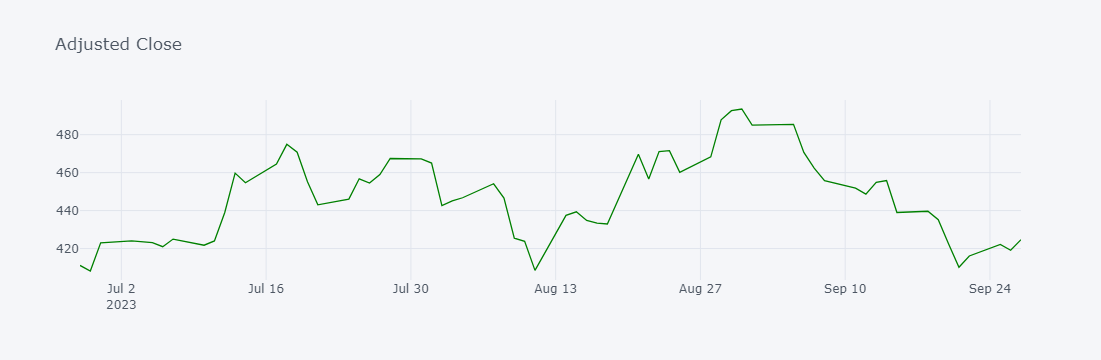

In [16]:
stock_data['Adj Close'].iplot(title='Adjusted Close', colors=['green'])

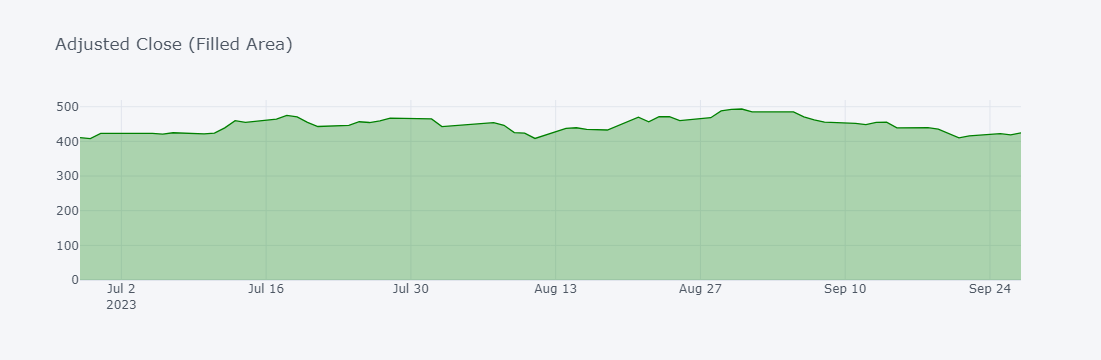

In [13]:
stock_data['Adj Close'].iplot(title='Adjusted Close (Filled Area)', fill=True, colors=['green'])

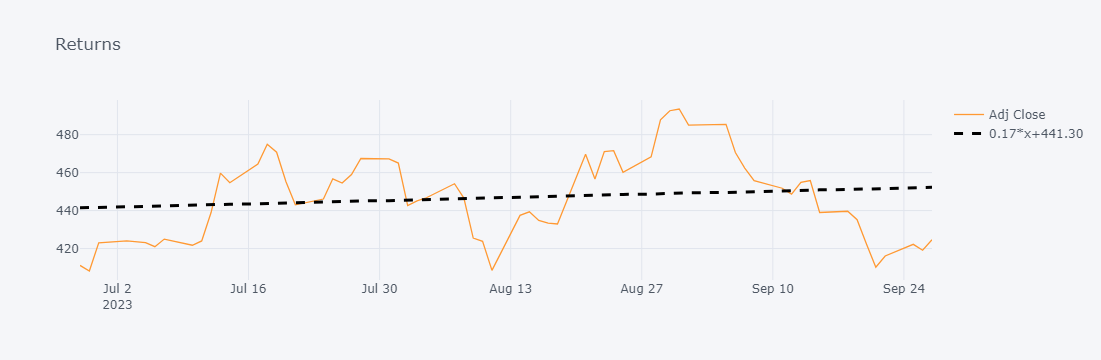

In [17]:
stock_data['Adj Close'].iplot(title='Returns', bestfit=True, bestfit_colors=['black'])

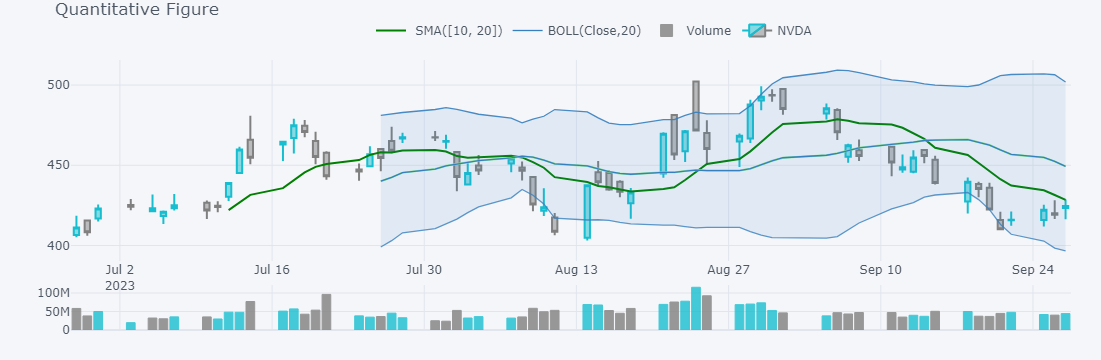

In [18]:
qf = cf.QuantFig(stock_data, title='Quantitative Figure', legend='top', name=ticker.value)
qf.add_sma([10, 20], width=2, color=['green', 'lightgreen'], legendgroup=True)
qf.add_bollinger_bands()
qf.add_volume()
qf.iplot()

In [19]:
semiconductor_tickers = ['NVDA', 'INTC', 'AMD', 'TSM', 'MU']
semiconductor_data = yf.download(semiconductor_tickers, start=date.today() - relativedelta(months=+period.value), end=date.today())
semiconductor_data

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                \
                   AMD       INTC         MU        NVDA         TSM   
Date                                                                   
2023-06-28  110.169998  33.449661  66.944031  411.136139  100.398918   
2023-06-29  111.239998  32.792027  64.209183  408.186371  100.120361   
2023-06-30  113.910004  33.320126  62.991470  422.985138  100.398918   
2023-07-03  115.820000  33.499481  63.779987  424.095062  102.617409   
2023-07-05  113.949997  32.393459  61.943443  423.135162  100.468552   
...                ...        ...        ...         ...         ...   
2023-09-21   96.110001  34.650002  67.900002  410.170013   85.360001   
2023-09-22   96.199997  34.180000  68.879997  416.100006   85.639999   
2023-09-25   97.379997  34.290001  68.580002  422.220001   86.239998   
2023-09-26   95.959999  33.830002  67.940002  419.109985   84.290001   
2023-09-27   98.070000  34.610001  68.209999  424.679993   85.440002   

                 Close                                                ...  \
                   AMD       INTC         MU        NVDA         TSM  ...   
Date                                                                  ...   
2023-06-28  110.169998  33.570000  67.070000  411.170013  100.919998  ...   
2023-06-29  111.239998  32.910000  64.330002  408.220001  100.639999  ...   
2023-06-30  113.910004  33.439999  63.110001  423.019989  100.919998  ...   
2023-07-03  115.820000  33.619999  63.900002  424.130005  103.150002  ...   
2023-07-05  113.949997  32.509998  62.060001  423.170013  100.989998  ...   
...                ...        ...        ...         ...         ...  ...   
2023-09-21   96.110001  34.650002  67.900002  410.170013   85.360001  ...   
2023-09-22   96.199997  34.180000  68.879997  416.100006   85.639999  ...   
2023-09-25   97.379997  34.290001  68.580002  422.220001   86.239998  ...   
2023-09-26   95.959999  33.830002  67.940002  419.109985   84.290001  ...   
2023-09-27   98.070000  34.610001  68.209999  424.679993   85.440002  ...   

                  Open                                                \
                   AMD       INTC         MU        NVDA         TSM   
Date                                                                   
2023-06-28  108.209999  33.610001  65.650002  406.600006  100.500000   
2023-06-29  112.070000  33.340000  67.839996  415.579987  101.339996   
2023-06-30  113.029999  33.360001  64.500000  416.799988  101.400002   
2023-07-03  115.160004  33.540001  63.439999  425.170013  102.250000   
2023-07-05  116.099998  33.310001  63.500000  421.350006  101.400002   
...                ...        ...        ...         ...         ...   
2023-09-21   98.599998  34.570000  69.000000  415.829987   86.040001   
2023-09-22   96.919998  34.810001  68.589996  415.720001   86.250000   
2023-09-25   95.949997  34.000000  68.290001  415.910004   85.389999   
2023-09-26   96.500000  34.139999  67.970001  420.010010   84.949997   
2023-09-27   96.820000  33.919998  68.120003  423.299988   85.169998   

              Volume                                          
                 AMD      INTC        MU      NVDA       TSM  
Date                                                          
2023-06-28  67534100  33906900  27100100  58263900   8160900  
2023-06-29  58347200  38313000  51141900  38051400   7383900  
2023-06-30  53331900  33798400  31530900  50053400  11701700  
2023-07-03  31860000  15753000  12921300  19820900   5638400  
2023-07-05  49501600  37664700  16553000  32361800   9010800  
...              ...       ...       ...       ...       ...  
2023-09-21  59628600  45215900  14967500  44893000  10652500  
2023-09-22  52111500  29232700  15487200  47817500   7967200  
2023-09-25  43223700  21729400  14900000  41909100   8758000  
2023-09-26  42866500  34198300  12752500  40228200   8877600  
2023-09-27  51206600  44352300  20673800  44359100   7860700  

[64 rows x 30 columns]

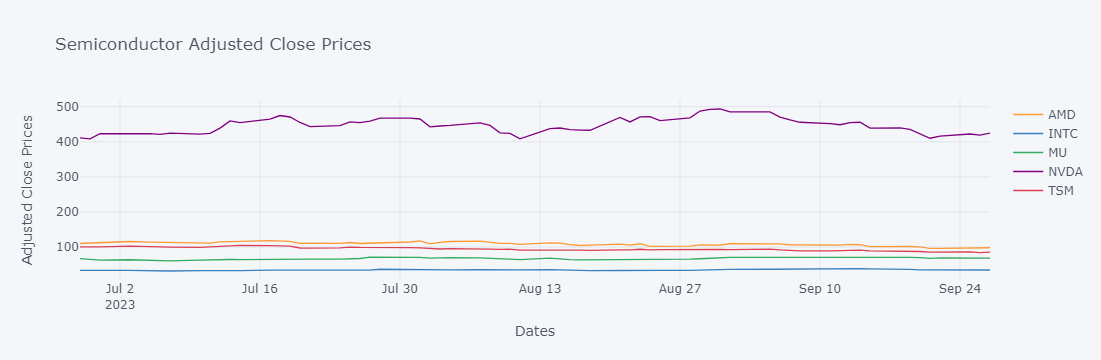

In [20]:
semiconductor_data['Adj Close'].iplot(title='Semiconductor Adjusted Close Prices', xTitle='Dates', yTitle='Adjusted Close Prices')

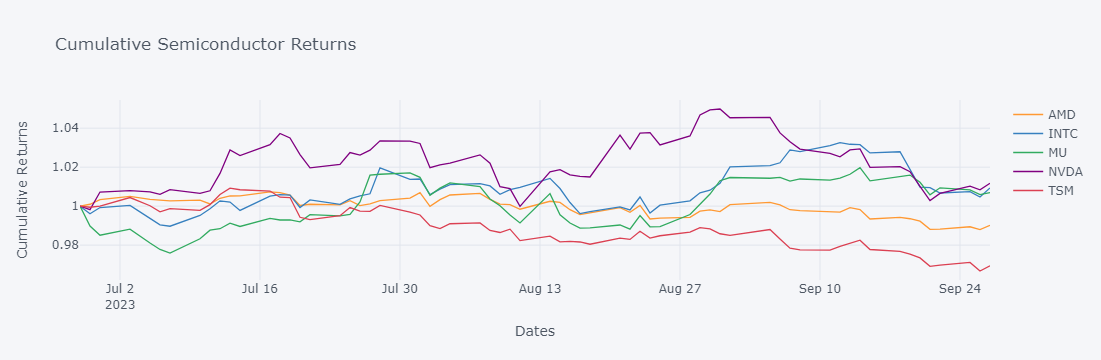

In [21]:
semiconductor_returns = semiconductor_data['Adj Close'].pct_change() # Calculate daily returns for each company
semiconductor_returns.iloc[0, :] = 0 # Set the initial value of returns to 0 (first day)
weights = np.array([0.1, 0.2, 0.25, 0.25, 0.2]) # Define the weights for each company in the portfolio; You can flexibly adjust these weights as needed
weighted_returns = weights * semiconductor_returns # Calculate the weighted returns for each company
cumulative_returns = (weighted_returns + 1).cumprod() # Calculate cumulative returns for the portfolio
cumulative_returns.iplot(title='Cumulative Semiconductor Returns', xTitle='Dates', yTitle='Cumulative Returns')

In [23]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0OECEN/requirements.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.
